In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import seaborn as sns
drink_menu = pd.read_csv('starbucks-menu-nutrition-drinks.csv')
drink_menu_expanded = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [2]:
drink_menu.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [3]:
drink_menu_expanded.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
calories = drink_menu_expanded.sort_values('Calories')

In [5]:
calories = calories.reset_index()

In [6]:
labels = calories['Beverage_category'].unique()
calories[calories['Beverage_category'] == 'Coffee']['Calories']

4    3
5    4
6    5
7    5
Name: Calories, dtype: int64

In [7]:
calories_dict = {}
for drinks in labels:
    calories_dict[drinks] = np.mean(calories[calories['Beverage_category'] == drinks]['Calories'])

In [8]:
labels

array(['Tazo® Tea Drinks', 'Coffee', 'Classic Espresso Drinks',
       'Shaken Iced Beverages', 'Frappuccino® Light Blended Coffee',
       'Signature Espresso Drinks', 'Frappuccino® Blended Coffee',
       'Frappuccino® Blended Crème', 'Smoothies'], dtype=object)

In [9]:
colors = sns.color_palette("Set2", 9)
colors = colors.as_hex()

In [10]:
color_dict = {}
for i,drinks in enumerate(labels):
    color_dict[drinks] = colors[i]

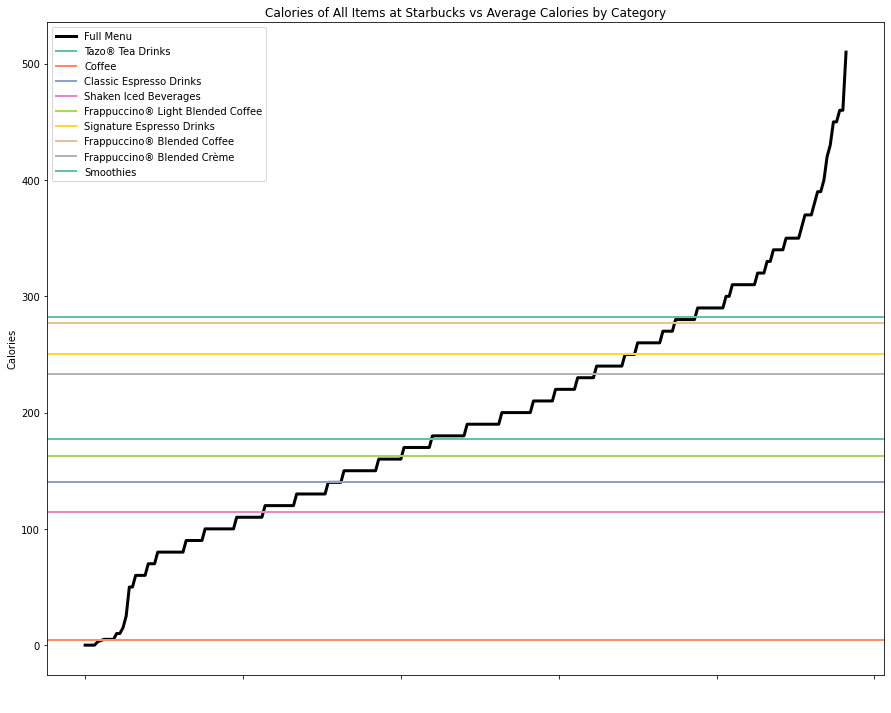

In [16]:
x_axis = range(0,len(calories))

fig,ax = plt.subplots(figsize=(15,12))

calories['Calories'].plot(label='Full Menu',linewidth=3,color='black')
for drinks in labels:
    ax = plt.axhline(calories_dict[drinks],color=color_dict[drinks],label=drinks,linewidth=2)
plt.title('Calories of All Items at Starbucks vs Average Calories by Category')
plt.ylabel('Calories')
plt.xticks(color='white')
plt.xlabel('Index',color='white')


plt.legend()
plt.show();

In [14]:
calories_dict

{'Tazo® Tea Drinks': 177.30769230769232,
 'Coffee': 4.25,
 'Classic Espresso Drinks': 140.17241379310346,
 'Shaken Iced Beverages': 114.44444444444444,
 'Frappuccino® Light Blended Coffee': 162.5,
 'Signature Espresso Drinks': 250.0,
 'Frappuccino® Blended Coffee': 276.94444444444446,
 'Frappuccino® Blended Crème': 233.07692307692307,
 'Smoothies': 282.22222222222223}

In [18]:
color_dict

{'Tazo® Tea Drinks': '#66c2a5',
 'Coffee': '#fc8d62',
 'Classic Espresso Drinks': '#8da0cb',
 'Shaken Iced Beverages': '#e78ac3',
 'Frappuccino® Light Blended Coffee': '#a6d854',
 'Signature Espresso Drinks': '#ffd92f',
 'Frappuccino® Blended Coffee': '#e5c494',
 'Frappuccino® Blended Crème': '#b3b3b3',
 'Smoothies': '#66c2a5'}

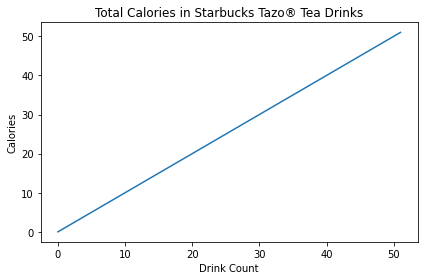

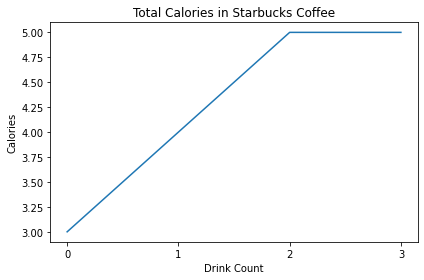

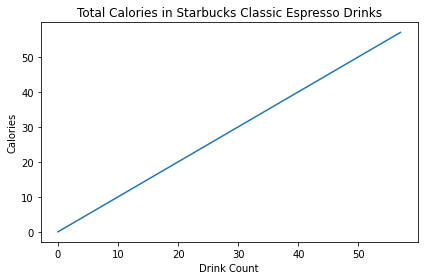

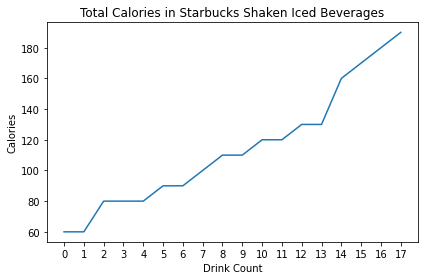

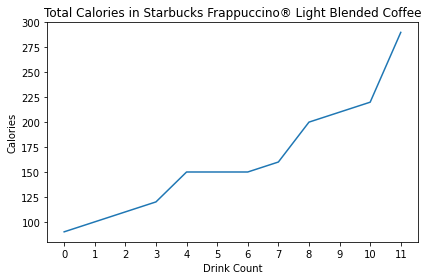

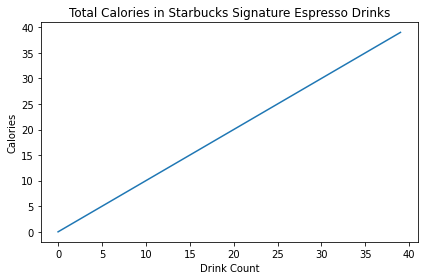

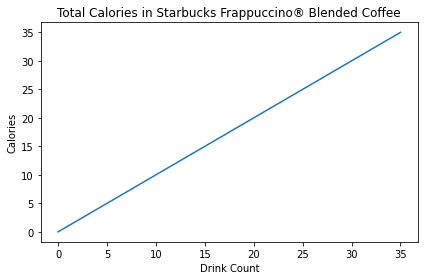

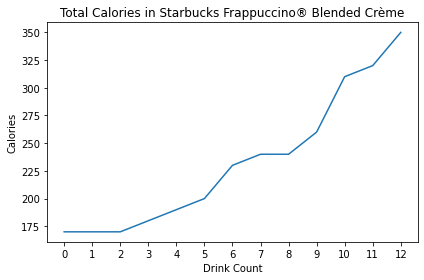

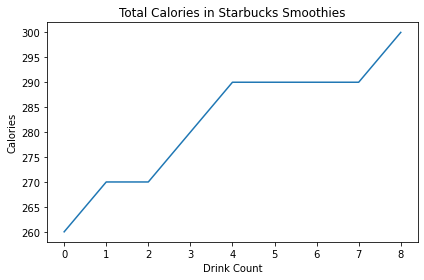

In [12]:
for drinks in labels:
    x_axis_str = []
    ind_cals = calories[calories['Beverage_category'] == drinks]['Calories']
    x_axis = range(0,len(ind_cals))
    if len(x_axis) < 25:
        for x in x_axis:
            x = str(x)
            x_axis_str.append(x)
        plt.plot(x_axis_str,ind_cals)
    else:
        plt.plot(x_axis)
    plt.title('Total Calories in Starbucks '+ drinks)
    plt.xlabel('Drink Count')
    plt.ylabel('Calories')
    plt.tight_layout()
    plt.show() 